In [35]:
%reload_ext autoreload

In [36]:
%autoreload 2

In [37]:
import AccuracyMetrics as a
import BPCA as b
import Helpers as h
import KNN as k
import LR as l
import MCROC as mc
import RF as r
import SVM as s

In [38]:
# take out the trash
import gc
import warnings
gc.collect()
warnings.filterwarnings('ignore')

# Python magic
%matplotlib inline

# Base packages
import gc, sys, re, os, math
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

# Sklearn: KNN, SVM, LR, RF
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import GridSearchCV

In [39]:
X_train2 = pd.read_csv('../data/1/TrainData2.txt', delimiter='\s+', header=None)
y_train2 = pd.read_csv('../data/1/TrainLabel2.txt', delimiter='\n', header=None)
X_test2 = pd.read_csv('../data/1/TestData2.txt', delimiter='\s+', header=None)

X_train3 = pd.read_csv('../data/1/TrainData3.txt', delimiter='\s+', header=None)
y_train3 = pd.read_csv('../data/1/TrainLabel3.txt', delimiter='\n', header=None)
X_test3 = pd.read_csv('../data/1/TestData3.txt', delimiter=',',   header=None)

X_train4 = pd.read_csv('../data/1/TrainData4.txt', delimiter='\s+', header=None)
y_train4 = pd.read_csv('../data/1/TrainLabel4.txt', delimiter='\n', header=None)
X_test4 = pd.read_csv('../data/1/TestData4.txt', delimiter='\s+', header=None)

X_train5 = pd.read_csv('../data/1/TrainData5.txt', delimiter='\s+', header=None)
y_train5 = pd.read_csv('../data/1/TrainLabel5.txt', delimiter='\n', header=None)
X_test5 = pd.read_csv('../data/1/TestData5.txt', delimiter='\s+', header=None)

X_train6 = pd.read_csv('../data/1/TrainData6.txt', delimiter='\s+', header=None)
y_train6 = pd.read_csv('../data/1/TrainLabel6.txt', delimiter='\n', header=None)
X_test6 = pd.read_csv('../data/1/TestData6.txt', delimiter='\s+', header=None)

X_training = [X_train2, X_train3, X_train4, X_train5, X_train6]
y_training = [y_train2, y_train3, y_train4, y_train5, y_train6]
X_testing = [X_test2, X_test3, X_test4, X_test5, X_test6]

for i,x in enumerate(X_training):
    print(f'X_TrainData{i+2} Shape: {x.shape}')

for i,y in enumerate(y_training):
    print(f'y_TrainData{i+2} Shape: {y.shape}')

for j,y in enumerate(X_testing):
    print(f'TestData{j+2} Shape: {y.shape}')

X_TrainData2 Shape: (100, 9182)
X_TrainData3 Shape: (6300, 13)
X_TrainData4 Shape: (2547, 112)
X_TrainData5 Shape: (1119, 11)
X_TrainData6 Shape: (612, 142)
y_TrainData2 Shape: (100, 1)
y_TrainData3 Shape: (6300, 1)
y_TrainData4 Shape: (2547, 1)
y_TrainData5 Shape: (1119, 1)
y_TrainData6 Shape: (612, 1)
TestData2 Shape: (74, 9182)
TestData3 Shape: (2693, 13)
TestData4 Shape: (1092, 112)
TestData5 Shape: (480, 11)
TestData6 Shape: (262, 142)


## Dataset 2

## PCA for DS2

In [40]:
h.printShapes(X_train2=X_train2.shape, y_train2=y_train2.shape, X_test2=X_test2.shape)

h.printHeads(X_train2=X_train2.head(), y_train2=y_train2.head())
           
h.printTails(y_train2=y_train2.tail())

X_train2 Shape: (100, 9182)

y_train2 Shape: (100, 1)

X_test2 Shape: (74, 9182)

X_train2 Head:        0         1         2         3         4        5         6     \
0  2.357935  1.505150  1.477121  1.301030  2.992995  1.30103  2.729974   
1  1.995635  1.633468  1.740363  1.819544  3.703377  1.30103  3.000434   
2  1.929419  1.301030  1.447158  1.301030  3.377852  1.30103  3.053463   
3  2.227887  1.602060  1.556302  1.908485  3.424392  1.30103  3.084219   
4  1.763428  1.623249  1.301030  2.029384  3.551694  1.30103  3.165541   

       7         8         9     ...      9172      9173      9174      9175  \
0  3.275542  3.531734  2.117271  ...  1.531479  1.792392  2.000000  1.477121   
1  3.118926  3.363424  1.568202  ...  1.755875  2.064458  1.431364  1.633468   
2  3.390405  3.359836  1.707570  ...  1.982271  2.198657  1.301030  1.707570   
3  3.288696  3.364176  1.301030  ...  1.792392  2.204120  1.633468  1.716003   
4  3.141450  3.495128  1.886491  ...  1.301030  1.785330  

In [41]:
X_train2_cmp, X_test2_cmp = b.trainPCA(X_train2, X_test2)

X_train Variance: 0.9287852222496773
X_train Shape: (100, 9182)
X_train Variance: 1.0
X_train Shape: (74, 74)


In [42]:
h.printShapes(X_train2_cmp=X_train2_cmp.shape, y_train2=y_train2.shape, X_test2_cmp=X_test2_cmp.shape)

X_train2_cmp Shape: (100, 74)

y_train2 Shape: (100, 1)

X_test2_cmp Shape: (74, 74)



### KNN for DS2

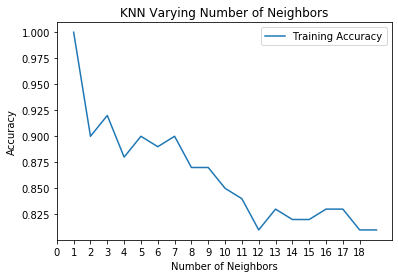

In [43]:
n_neighbors2, train_accuracy2 = k.testK(X_train2_cmp, y_train2)
k.plotTestK(n_neighbors2, train_accuracy2)

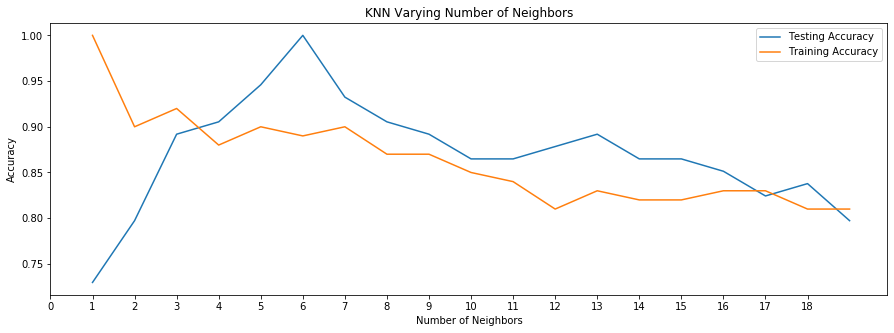

In [44]:
y_test2 = k.getTestLabelsKNN(6, X_train2_cmp, y_train2, X_test2_cmp)
n2, test_acc2, train_acc2 = k.optimizeK(X_train2_cmp, y_train2, X_test2_cmp, y_test2, 20)
k.plotK(n2, test_acc2, train_acc2, [15, 5])

In [45]:
n_neighbors2=10
knn_score2, knn_y_pred2 = k.runKNN(n_neighbors2, X_train2_cmp, y_train2, X_test2_cmp, y_test2)
print(f'Accuracy: {knn_score2}')

Accuracy: 0.8648648648648649


In [46]:
knn_keys2, knn_vals2, knn_labels2 = h.countUniqueValues(knn_y_pred2)

Keys: dict_keys([2, 1, 6, 5, 11, 3, 4, 8])
Values: dict_values([3, 20, 26, 1, 1, 5, 15, 3])
Labels: [2, 1, 6, 5, 11, 3, 4, 8]


In [47]:
k.getScoresKNN(n_neighbors2, y_test2, knn_y_pred2)
pd.crosstab(y_test2, knn_y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

KNN Accuracy Score, k=10: 0.8648648648648649

KNN Confusion Matrix, k=10

[[15  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 3  0  1 15  0  1  0  0  0]
 [ 0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0 24  0  0  0]
 [ 2  1  0  0  0  0  3  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1]]

		  KNN Classification Report, k=10

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        15
           2       0.33      1.00      0.50         1
           3       0.80      1.00      0.89         4
           4       1.00      0.75      0.86        20
           5       1.00      0.50      0.67         2
           6       0.92      1.00      0.96        24
           8       1.00      0.50      0.67         6
           9       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1

    accuracy                           0.86        74
   macro avg       0.

Predicted,1,2,3,4,5,6,8,11,All
True,,,,,,,,,
1,15,0,0,0,0,0,0,0,15
2,0,1,0,0,0,0,0,0,1
3,0,0,4,0,0,0,0,0,4
4,3,0,1,15,0,1,0,0,20
5,0,0,0,0,1,1,0,0,2
6,0,0,0,0,0,24,0,0,24
8,2,1,0,0,0,0,3,0,6
9,0,1,0,0,0,0,0,0,1
11,0,0,0,0,0,0,0,1,1


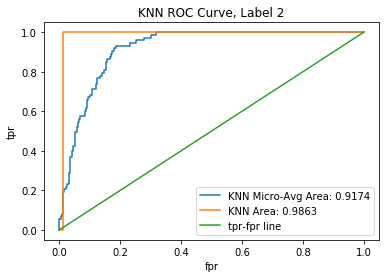

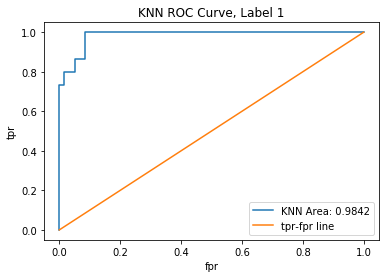

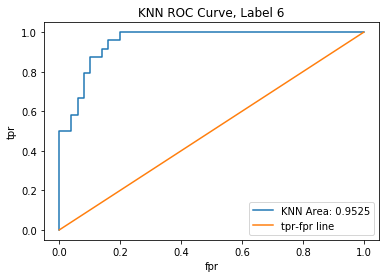

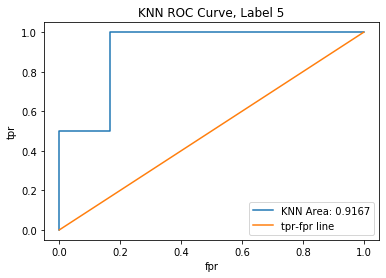

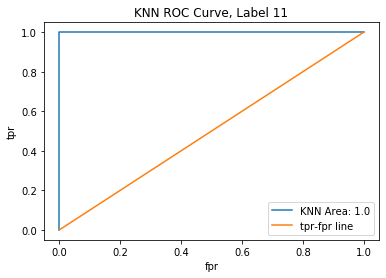

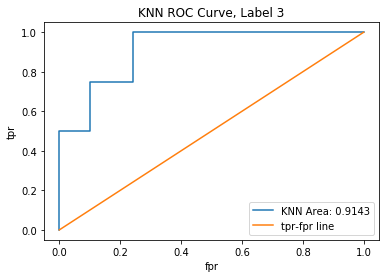

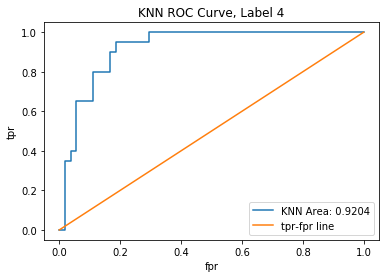

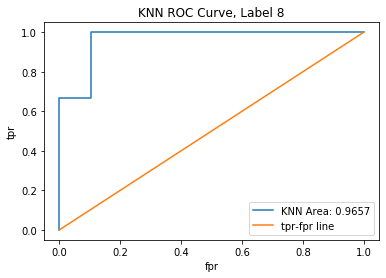

In [48]:
mc.calcMultiClassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, y_test2, model='KNN', tuner='k',\
 tuner_val=n_neighbors2, labels=knn_labels2, dec=False)

__________________________________________________________________________________________________________________________________________________

### Logistic Regression for DS2

In [49]:
c2 = 10
lr_cma2, lr_cr2, lr_acc2, lr_y_pred2, ky2, val2 = l.runLogisticRegression(c2, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

print(f'Logistic Regression Highest Accuracy Score, c={ky2}: {val2}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma2[ky2]}\n')
pd.crosstab(y_test2, lr_y_pred2[ky2], rownames=['True'], colnames=['Predicted'], margins=True)

Logistic Regression Highest Accuracy Score, c=5: 0.5405405405405406

Logistic Regression Most Accurate Confusion Matrix

[[ 8  0  0  0  2  0  0  1  0  3  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  1  1  0  0]
 [ 0  0  1 11  3  0  0  0  3  2  0]
 [ 0  1  0  0  1  0  0  0  0  0  0]
 [ 0  1  2  0  2 12  2  0  1  1  3]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]



Predicted,1,2,3,4,5,6,7,8,9,10,11,All
True,,,,,,,,,,,,
1,8,0,0,0,2,0,0,1,0,3,1,15
2,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,2,0,0,0,0,1,1,0,0,4
4,0,0,1,11,3,0,0,0,3,2,0,20
5,0,1,0,0,1,0,0,0,0,0,0,2
6,0,1,2,0,2,12,2,0,1,1,3,24
8,0,0,0,0,0,0,0,4,0,1,1,6
9,0,1,0,0,0,0,0,0,0,0,0,1
11,0,0,0,0,0,0,0,0,0,0,1,1


In [50]:
print(f'\n\t   Logistic Regression Classification Report C={ky2}\n\n{lr_cr2[ky2]}')


	   Logistic Regression Classification Report C=5

              precision    recall  f1-score   support

           1       1.00      0.53      0.70        15
           2       0.25      1.00      0.40         1
           3       0.40      0.50      0.44         4
           4       1.00      0.55      0.71        20
           5       0.12      0.50      0.20         2
           6       1.00      0.50      0.67        24
           7       0.00      0.00      0.00         0
           8       0.67      0.67      0.67         6
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.17      1.00      0.29         1

    accuracy                           0.54        74
   macro avg       0.42      0.48      0.37        74
weighted avg       0.88      0.54      0.64        74



In [51]:
lr_keys2, lr_vals2, lr_labels2 = h.countUniqueValues(lr_y_pred2)

Keys: dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Values: dict_values([array([ 2, 10,  2,  9,  6,  5,  3,  6,  8, 11,  9, 10,  3,  8,  5,  5,  9,
        4,  6,  5,  8,  8,  5, 11,  1,  1,  1,  1,  1,  1,  5,  1,  6, 10,
       10,  5,  5,  8,  5,  7,  7,  6, 11,  8,  6,  9,  4,  4,  7, 10,  4,
        4,  4,  4,  4,  4,  4,  4,  3,  3,  6,  6,  6, 11,  6, 11, 11,  6,
        2,  3, 10, 10,  2,  6]), array([ 2, 10,  2,  9,  6,  5,  3,  6,  8, 11,  9, 10,  3,  8,  5,  5,  9,
        4,  6,  5,  8,  8,  5, 11,  1,  1,  1,  1,  1,  1,  5,  1,  6, 10,
       10,  5,  5,  8,  5,  7,  7,  6, 11,  8,  6,  9,  4,  4,  7, 10,  4,
        4,  4,  4,  4,  4,  4,  4,  3,  3,  6,  6,  6, 11,  6, 11, 11,  6,
        2,  3, 10, 10,  2,  6]), array([ 2, 10,  2,  9,  6,  5,  3,  6,  8, 11,  9, 10,  3,  8,  5,  5,  9,
        4,  6,  5,  8,  8,  5, 11,  1,  1,  1,  1,  1,  1,  5,  1,  6, 10,
       10,  5,  5,  8,  5,  7,  7,  6, 11,  8,  6,  9,  4,  4,  7, 10,  4,
        4,  4,  4,  4,  4,  4,  4,  3, 

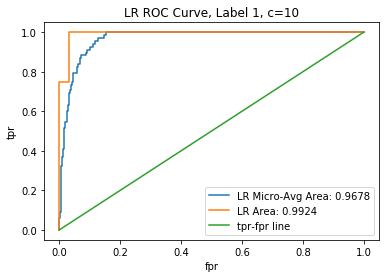

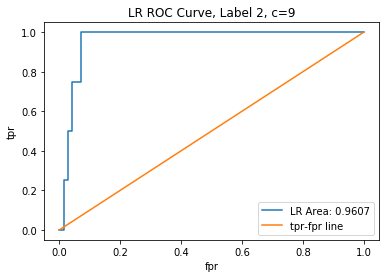

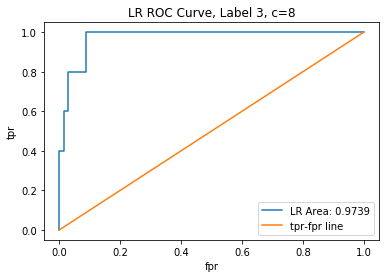

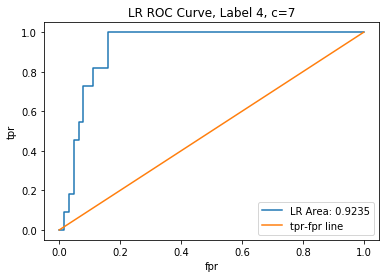

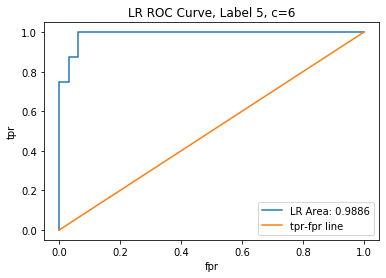

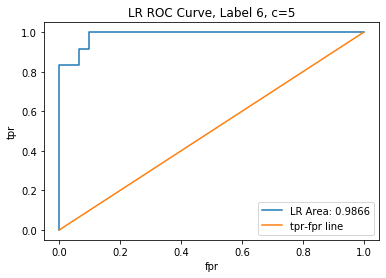

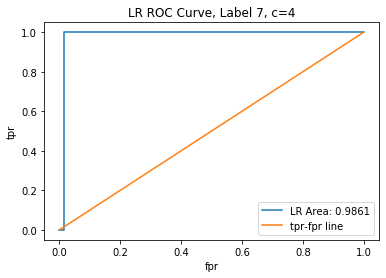

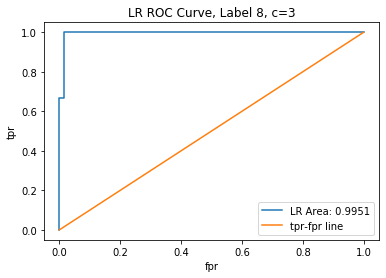

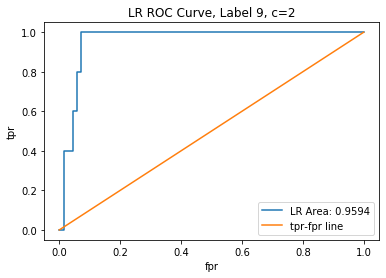

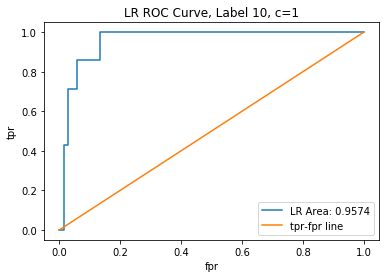

In [52]:
mc.calcMultiClassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, lr_y_pred2[ky2], model='LR', tuner='c', tuner_val=c2, labels=lr_labels2, dec=True)

## Random Forest for DS2

Keys: dict_keys([2, 9, 5, 3, 6, 10, 1, 4, 8, 11, 7])
Values: dict_values([3, 1, 18, 12, 8, 5, 3, 8, 7, 4, 5])
Labels: [2, 9, 5, 3, 6, 10, 1, 4, 8, 11, 7]
Random Forest Accuracy Score: 0.2972972972972973

Random Forest Confusion Matrix

[[2 0 5 0 4 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 2 1 0 0 0 0 0 1 0]
 [0 1 2 5 8 0 3 0 0 1 0]
 [0 0 0 0 2 0 0 0 0 0 0]
 [0 1 2 2 2 8 2 3 0 2 2]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 2 0 0 3 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.67      0.13      0.22        15
           2       0.00      0.00      0.00         1
           3       0.17      0.50      0.25         4
           4       0.62      0.25      0.36        20
           5       0.11      1.00      0.20         2
           6       1.00      0.33      0.50        24
           7       0.00      0.00      0.00         0
           8  

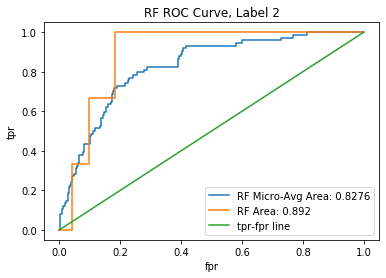

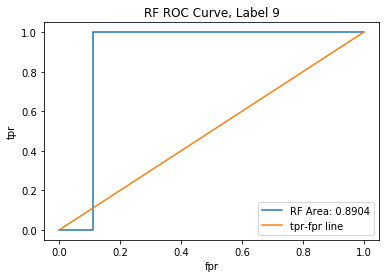

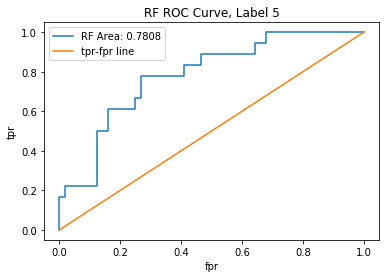

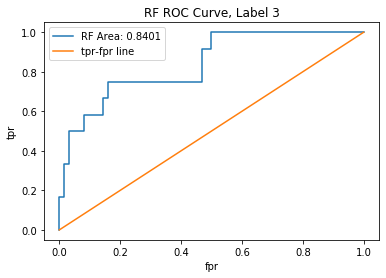

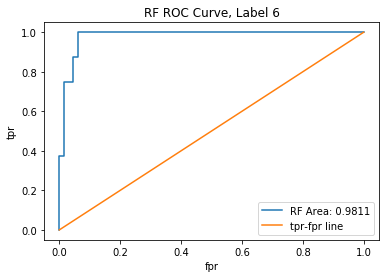

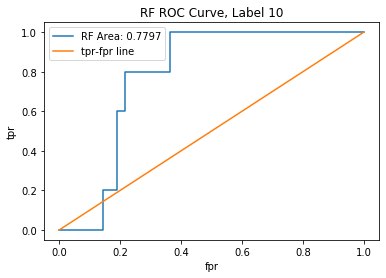

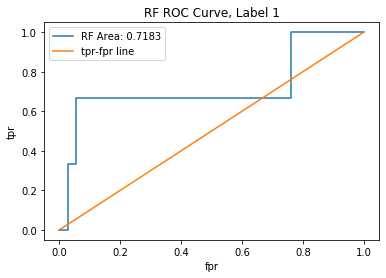

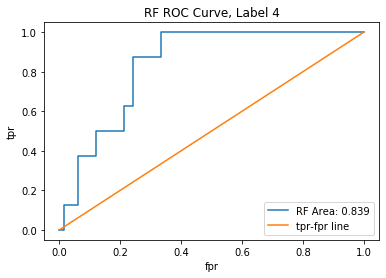

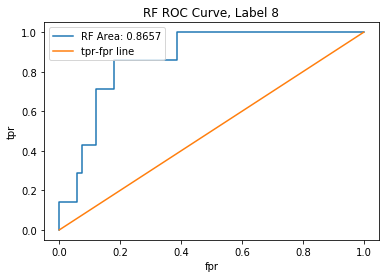

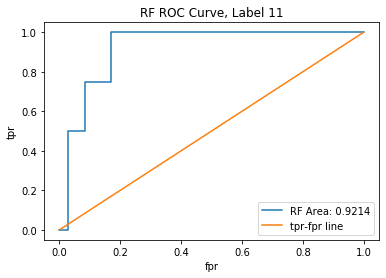

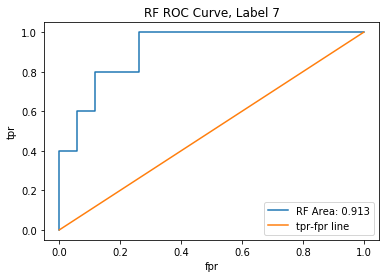

In [54]:
r.runRandomForest(X_train2_cmp, y_train2, X_test2_cmp, y_test2)

## SVM for DS2

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, 9, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

# Dataset 3

In [ ]:
X_train3.shape

In [ ]:
X_train3.head()

In [ ]:
X_train3 =  replaceWithNan(X_train3, 0, 12)

In [ ]:
X_train3 =  runFastKNN(X_train3, 50)

## KNN for DS3

In [ ]:
X_test3.shape

In [ ]:
 Helpers.printHeads(y_train3=y_train3.head(), y_test3=X_test3.head())

In [ ]:
y_train3.tail()

In [ ]:
neighbors3, train_accuracy3 = testK(X_train3, y_train3)
plotTestK(neighbors3, train_accuracy3)

In [ ]:
# # Run KNN to get y_test3 data
y_test3 = getTestLabelsKNN(1, X_train3, y_train3, X_test3)
n3, test_acc3, train_acc3 = optimizeK(X_train3, y_train3, X_test3, y_test3)
plotK(n3, test_acc3, train_acc3)

In [ ]:
n_neighbors3=1
knn_score3, knn_y_pred3 = runKNN(n_neighbors3, X_train3, y_train3, X_test3, y_test3)
print(f'Accuracy: {knn_score3}')

KNN Accuracy Score, k=1: 1.0

KNN Confusion Matrix, k=1

[[447   0   0   0   0   0   0   0   0]
 [  0 409   0   0   0   0   0   0   0]
 [  0   0 189   0   0   0   0   0   0]
 [  0   0   0 287   0   0   0   0   0]
 [  0   0   0   0 268   0   0   0   0]
 [  0   0   0   0   0 264   0   0   0]
 [  0   0   0   0   0   0 235   0   0]
 [  0   0   0   0   0   0   0 356   0]
 [  0   0   0   0   0   0   0   0 238]]

		  KNN Classification Report, k=1

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       447
           2       1.00      1.00      1.00       409
           3       1.00      1.00      1.00       189
           4       1.00      1.00      1.00       287
           5       1.00      1.00      1.00       268
           6       1.00      1.00      1.00       264
           7       1.00      1.00      1.00       235
           8       1.00      1.00      1.00       356
           9       1.00      1.00      1.00       238

    accuracy

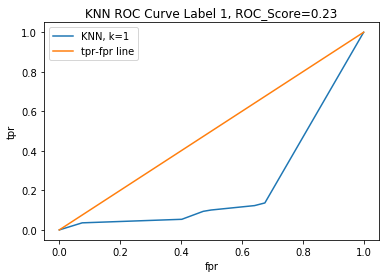

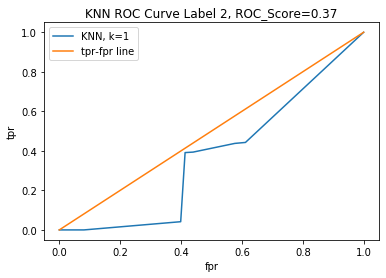

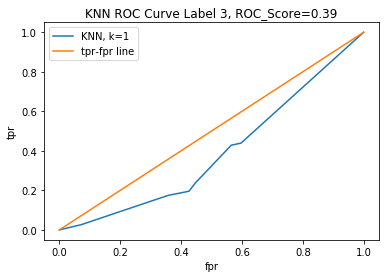

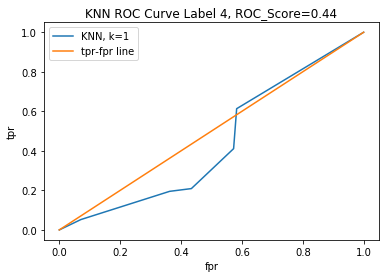

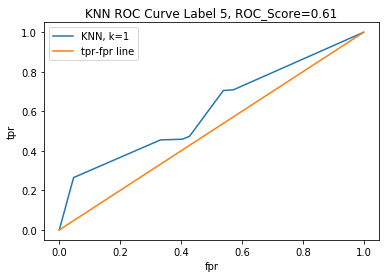

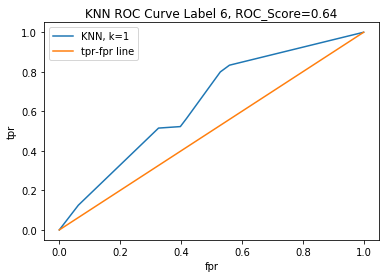

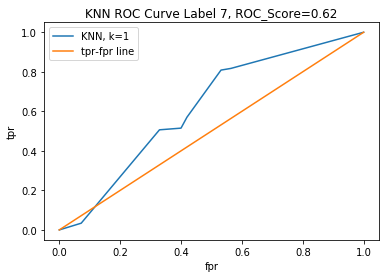

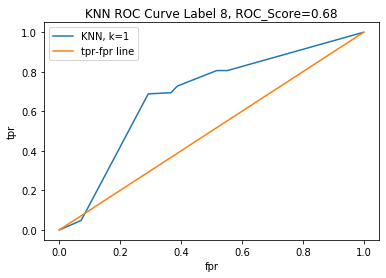

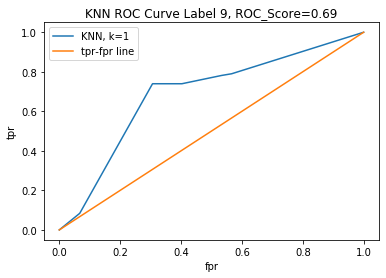

In [28]:
getScoresKNN(n_neighbors3, y_test3, knn_y_pred3)
pd.crosstab(y_test3, knn_y_pred3, rownames=['True'], colnames=['Predicted'], margins=True)
calcMultiClassROCAUC(X_train3, y_train3, X_test3, y_test3, model='KNN', tuner='k', tuner_val=n_neighbors3, label_len=9, dec=False)

## LR for DS3

Logistic Regression Highest Accuracy Score, C=20: 0.2688451541032306

Logistic Regression Most Accurate Confusion Matrix

[[374  14   0   6   1   7  20   9  16]
 [210   9   0   5   1  24 143  14   3]
 [ 91   8   1  13   0  30  10  31   5]
 [ 96  62   1  26   2  32   8  45  15]
 [ 70  10   0  25   2  39   2  47  73]
 [ 33  15   0  14   3  53   8 106  32]
 [ 39   9   1  14   1  47   5 110   9]
 [ 65   2   1   5   0  46   6 204  27]
 [ 33   3   0   1   0  11   5 135  50]]


	   Logistic Regression Classification Report C=20

              precision    recall  f1-score   support

           1       0.37      0.84      0.51       447
           2       0.07      0.02      0.03       409
           3       0.25      0.01      0.01       189
           4       0.24      0.09      0.13       287
           5       0.20      0.01      0.01       268
           6       0.18      0.20      0.19       264
           7       0.02      0.02      0.02       235
           8       0.29      0.57      

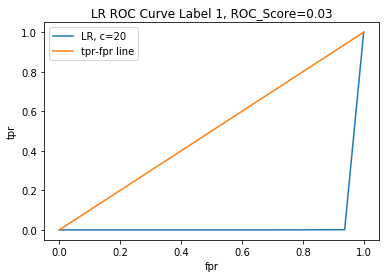

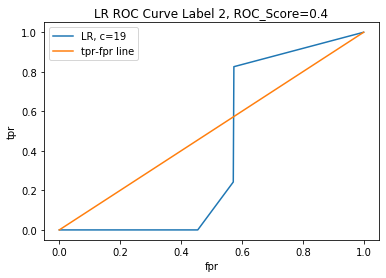

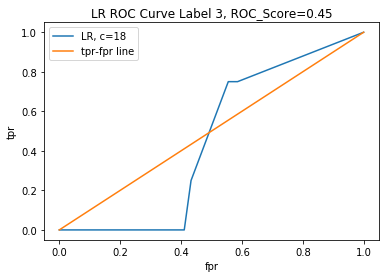

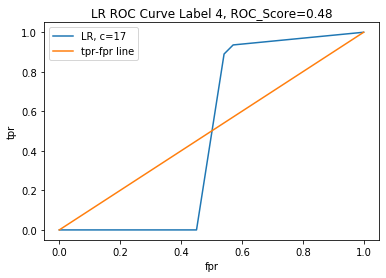

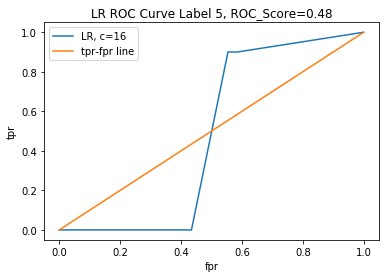

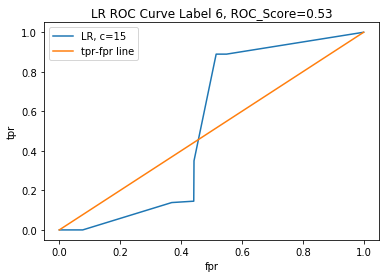

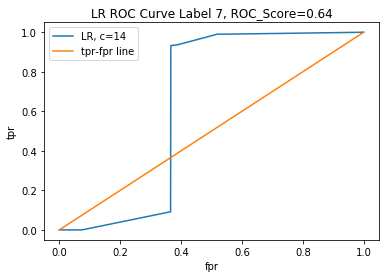

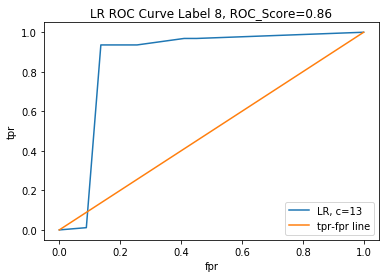

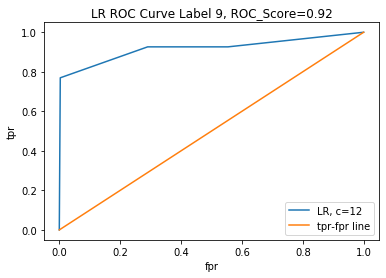

In [29]:
c3 = 20
lr_cma3, lr_cr3, lr_acc3, lr_y_pred3, ky3, val3 = runLogisticRegression(c3, X_train3, y_train3, X_test3, y_test3)
print(f'Logistic Regression Highest Accuracy Score, C={c3}: {val3}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma3[ky3]}\n')
pd.crosstab(y_test3, lr_y_pred3[ky3], rownames=['True'], colnames=['Predicted'], margins=True)
print(f'\n\t   Logistic Regression Classification Report C={c3}\n\n{lr_cr3[ky3]}')
calcMultiClassROCAUC(X_train3, y_train3, X_test3, lr_y_pred3[ky3], model='LR', tuner='c', tuner_val=c3, label_len=9, dec=True)

## Random Forest for DS3

Random Forest Accuracy Score: 0.47047901968065353

Random Forest Confusion Matrix

[[361  12  18  13   6   8  15   8   6]
 [118  92  31  28  24  25  29  40  22]
 [ 37  13  69  10   9  23   9  15   4]
 [ 67  19  13 101  12  25  16  25   9]
 [ 48  16  16  23  84  36  15  22   8]
 [ 28  10   9  16  13 113  31  31  13]
 [ 16   4   7  11  10  36 108  33  10]
 [ 22   4   4  11   7  26  33 211  38]
 [ 35   4   3   1   5  13  11  38 128]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.49      0.81      0.61       447
           2       0.53      0.22      0.32       409
           3       0.41      0.37      0.38       189
           4       0.47      0.35      0.40       287
           5       0.49      0.31      0.38       268
           6       0.37      0.43      0.40       264
           7       0.40      0.46      0.43       235
           8       0.50      0.59      0.54       356
           9       0.54      0.54    

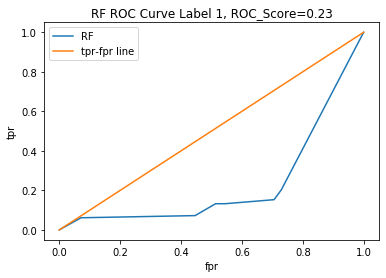

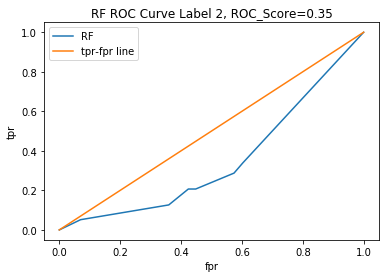

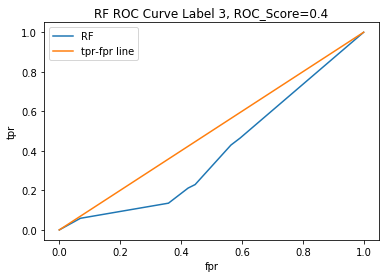

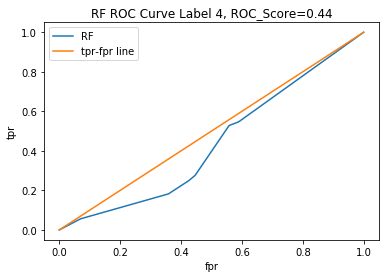

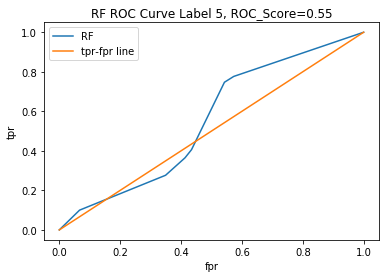

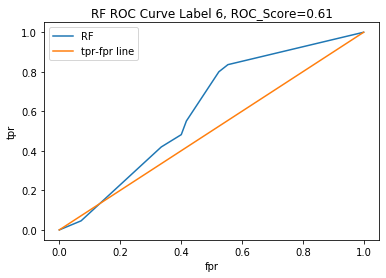

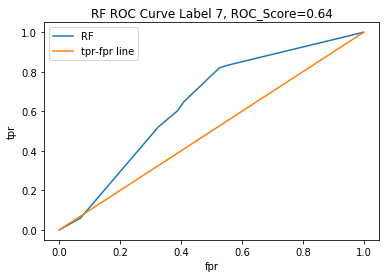

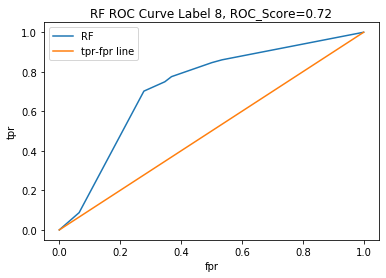

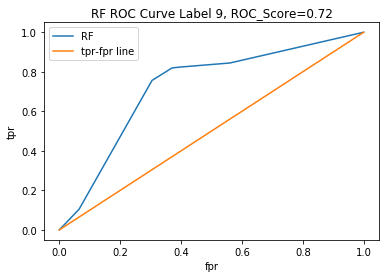

In [30]:
runRandomForest(X_train3, y_train3, X_test3, y_test3, 9)

## SVM for DS3

SVM linear Kernel results
_________________________________________
SVM linear Kernel Accuracy Score: 0.2699591533605644

SVM linear Kernel Confusion Matrix

[[372  12   2   9   0  11  23   9   9]
 [194  17   3   9   0  25 145  16   0]
 [ 76   5   4  32   0  36  12  24   0]
 [141   8   4  34   0  39   9  45   7]
 [ 61   3   0  37   0  45   6  48  68]
 [ 37   5   0  23   0  67  10  95  27]
 [ 37   2   1  16   0  55  14 109   1]
 [ 63   2   1  10   0  45  15 218   2]
 [ 51   0   0   1   0  11  12 162   1]]


		    SVM linear Kernel Classification Report

              precision    recall  f1-score   support

           1       0.36      0.83      0.50       447
           2       0.31      0.04      0.07       409
           3       0.27      0.02      0.04       189
           4       0.20      0.12      0.15       287
           5       0.00      0.00      0.00       268
           6       0.20      0.25      0.22       264
           7       0.06      0.06      0.06       235
        

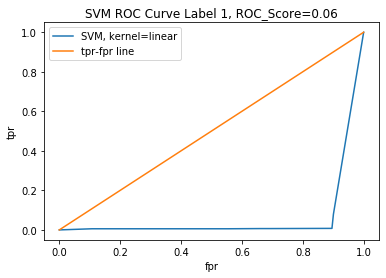

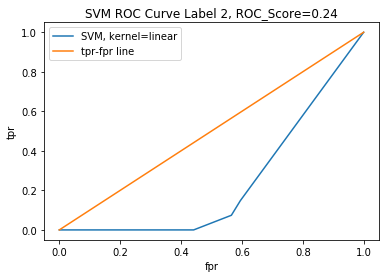

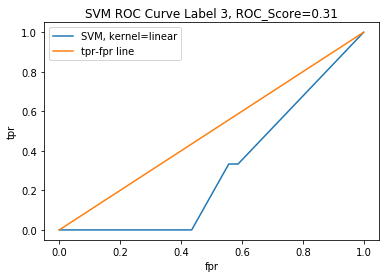

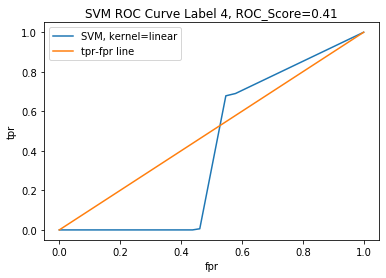

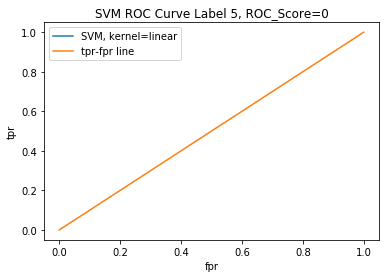

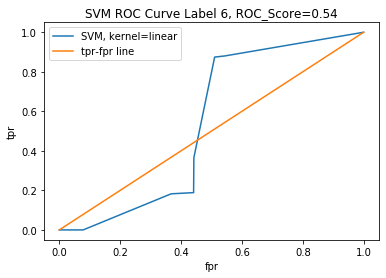

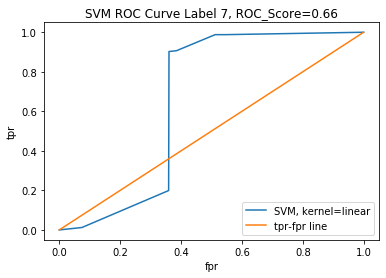

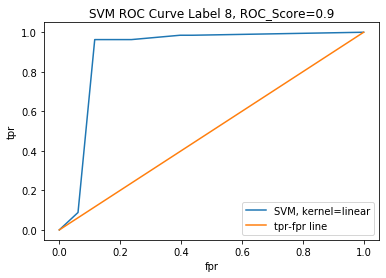

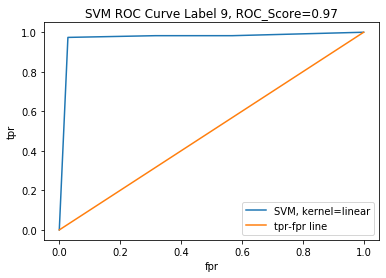

SVM poly Kernel results
_________________________________________
SVM poly Kernel Accuracy Score: 0.311919792053472

SVM poly Kernel Confusion Matrix

[[370  15   5  10   1   7   7   9  23]
 [109  31   8  18   2  26   3   5 207]
 [ 40  20  43  16   4  45   9   9   3]
 [ 74  17   6  38   7  42  20  21  62]
 [ 34  12  71  25  16  71   6  24   9]
 [ 27   9  10  13   4 100  25  45  31]
 [ 24   3   1   9   9  71  24  66  28]
 [ 31   3   2   7   0  64  26 155  68]
 [ 48   2   2   3   0  17   9  94  63]]


		    SVM poly Kernel Classification Report

              precision    recall  f1-score   support

           1       0.49      0.83      0.61       447
           2       0.28      0.08      0.12       409
           3       0.29      0.23      0.26       189
           4       0.27      0.13      0.18       287
           5       0.37      0.06      0.10       268
           6       0.23      0.38      0.28       264
           7       0.19      0.10      0.13       235
           8     

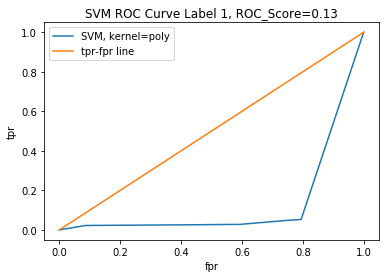

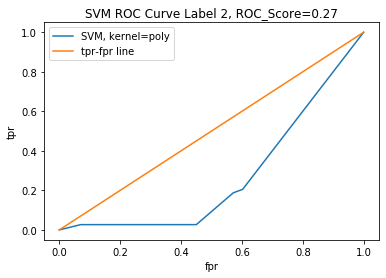

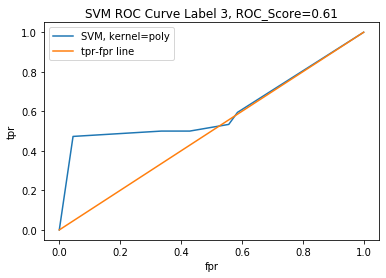

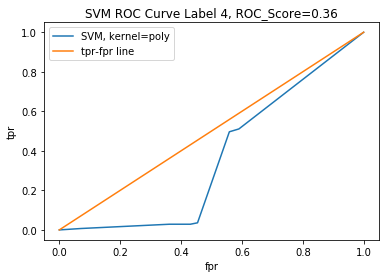

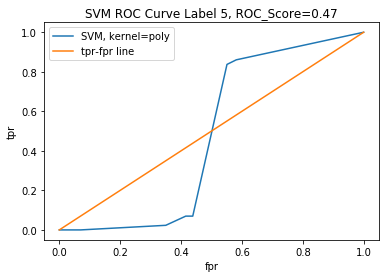

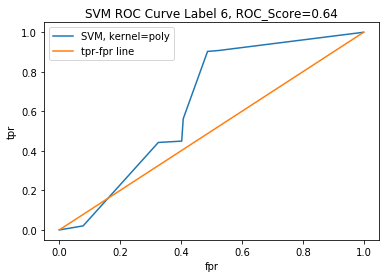

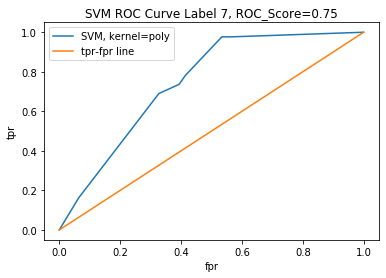

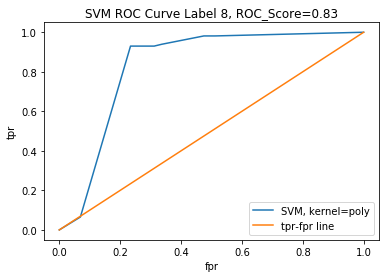

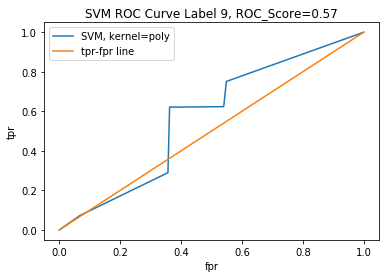

SVM rbf Kernel results
_________________________________________
SVM rbf Kernel Accuracy Score: 0.3044931303379131

SVM rbf Kernel Confusion Matrix

[[400  19   2  12   0   6   5   3   0]
 [324  32   3  14   1  25   3   7   0]
 [ 74  17   6  23   1  45   6  17   0]
 [144  21   1  43   0  43  10  25   0]
 [125   5   0  28   1  83   4  21   1]
 [ 67  12   1   9   0  95  13  60   7]
 [ 40   6   0   9   1  72  13  85   9]
 [ 65   5   0   8   0  55  22 170  31]
 [ 53   2   1   1   0  11   4 106  60]]


		    SVM rbf Kernel Classification Report

              precision    recall  f1-score   support

           1       0.31      0.89      0.46       447
           2       0.27      0.08      0.12       409
           3       0.43      0.03      0.06       189
           4       0.29      0.15      0.20       287
           5       0.25      0.00      0.01       268
           6       0.22      0.36      0.27       264
           7       0.16      0.06      0.08       235
           8       0

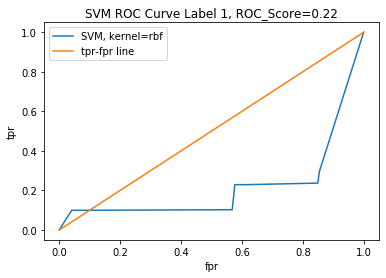

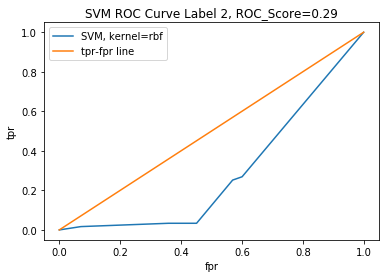

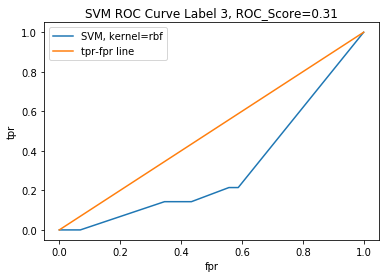

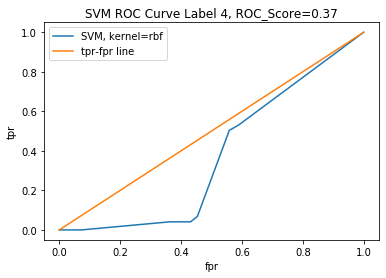

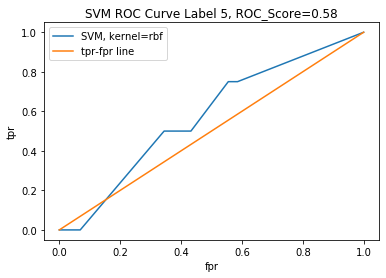

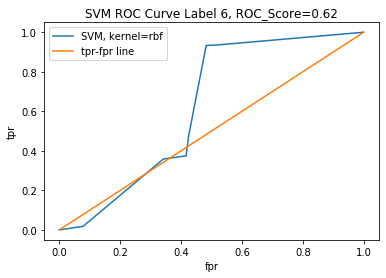

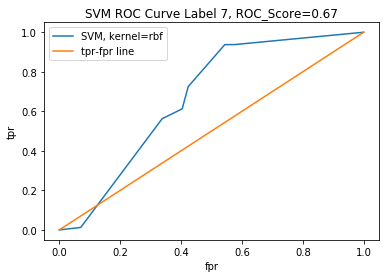

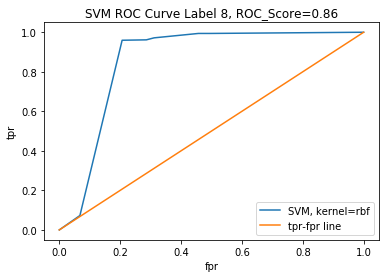

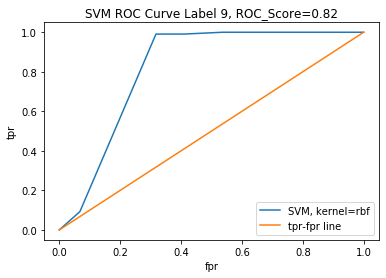

SVM sigmoid Kernel results
_________________________________________
SVM sigmoid Kernel Accuracy Score: 0.2636464909023394

SVM sigmoid Kernel Confusion Matrix

[[279 166   0   0   0   0   0   2   0]
 [ 97 308   0   0   0   0   0   3   1]
 [108  70   1   2   0   0   0   8   0]
 [100 167   0   3   0   1   0  15   1]
 [ 82 156   1   2   0   0   0  26   1]
 [117  88   0   7   0   2   0  46   4]
 [106  67   0   5   0   2   0  50   5]
 [119 104   1   6   0   3   0  99  24]
 [ 47  78   1   8   1   3   0  82  18]]


		    SVM sigmoid Kernel Classification Report

              precision    recall  f1-score   support

           1       0.26      0.62      0.37       447
           2       0.26      0.75      0.38       409
           3       0.25      0.01      0.01       189
           4       0.09      0.01      0.02       287
           5       0.00      0.00      0.00       268
           6       0.18      0.01      0.01       264
           7       0.00      0.00      0.00       235
    

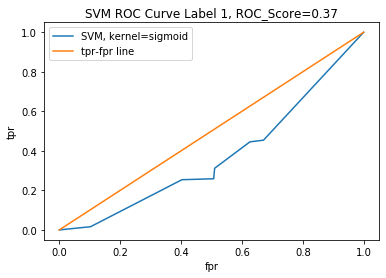

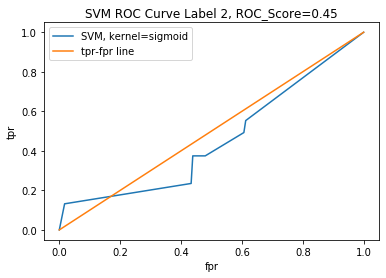

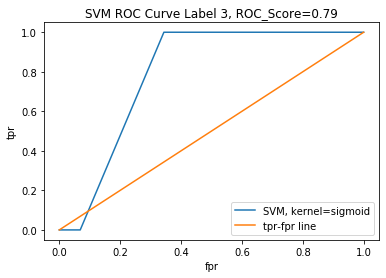

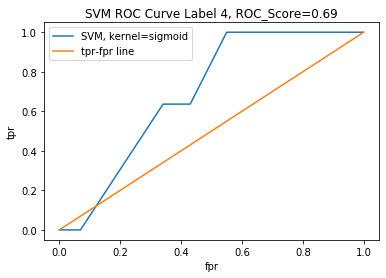

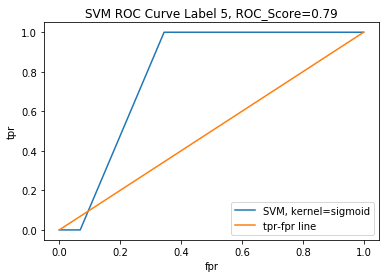

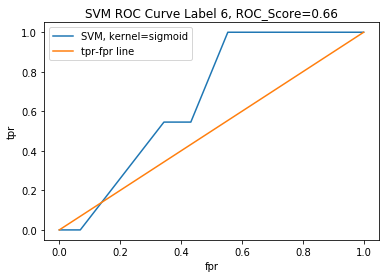

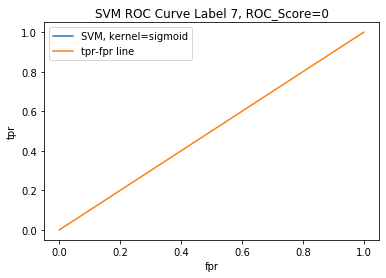

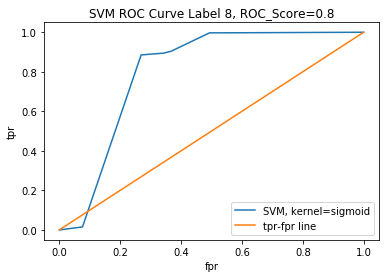

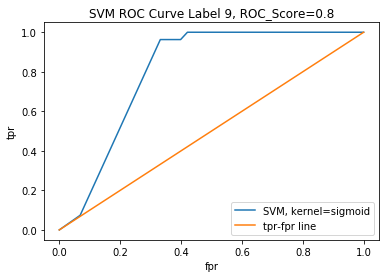

In [31]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, 9, X_train3, y_train3, X_test3, y_test3)

## Dataset 4

In [37]:
Helpers.printShapes(X_train4=X_train4.shape, X_test4=X_test4.shape, y_train4=y_train4.shape)

Helpers.printHeads(X_train4=X_train4.head(), X_test4=X_test4.head(), y_train4=y_train4.head())

X_train4 Shape: (2547, 112)

X_test4 Shape: (1092, 112)

y_train4 Shape: (2547, 1)

X_train4 Head:        0        1        2         3         4         5        6         7    \
0 -0.44987 -0.20049 -0.48729 -0.061085 -0.051024 -0.021653  0.30788 -0.057097   
1 -0.52843 -0.25912 -0.42584 -0.061339 -0.075853 -0.027442  0.30166 -0.064007   
2 -0.49823 -0.26346 -0.40683 -0.050683 -0.066742 -0.024397  0.27500 -0.130610   
3 -0.42405 -0.18392 -0.33761 -0.035511 -0.048362 -0.008383  0.23487 -0.197570   
4 -0.21487 -0.24508 -0.25204 -0.111790 -0.045751 -0.035225  0.21666 -0.216510   

        8        9    ...       102       103     104     105     106     107  \
0 -0.015610  0.13241  ...    4.5912   23.2100  146.23 -178.08  152.01 -129.72   
1 -0.042905  0.33057  ...    9.7736   -4.6825  103.02 -182.73  168.97 -151.29   
2 -0.105670  0.28596  ...   38.8230  -53.3400  161.33 -180.05  151.52 -127.85   
3 -0.075233  0.13323  ...   81.5990  -93.0770  145.09  172.44 -196.78 -135.79   
4 -0.0852

In [33]:
X_test4.tail()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
1087,-0.042106,-0.060041,-0.052885,-0.066470,-0.046249,-0.080368,0.039437,-0.37812,-0.30987,0.070089,...,171.26,-177.65,175.35,141.95,-145.25,195.870,-220.17,203.51,-185.19,190.42
1088,-0.075579,-0.057300,-0.054729,-0.098470,-0.094048,-0.067433,0.001865,-0.38659,-0.29077,0.085219,...,175.34,-195.36,180.89,158.21,-215.23,-84.344,105.40,205.39,-191.70,195.67
1089,-0.046965,-0.070540,-0.058407,-0.105140,-0.128010,-0.080368,0.009211,-0.38623,-0.30120,0.101070,...,189.89,-205.38,186.58,172.02,-139.57,105.950,-142.26,143.56,-125.91,178.52
1090,-0.053778,-0.025624,-0.049878,-0.093137,-0.107260,-0.051512,0.025017,-0.39009,-0.29406,0.078960,...,183.00,-176.71,184.49,145.63,-141.06,211.050,-204.05,184.96,-204.15,188.35
1091,-0.086850,-0.088063,-0.104710,-0.145800,-0.158830,-0.080368,0.036635,-0.39016,-0.32705,0.089560,...,198.30,-221.31,188.51,184.50,-221.56,197.830,-179.47,167.73,-140.18,172.17


In [34]:
X_train4_cmp, X_test4_cmp = trainPCA(X_train4, X_test4)

X_train Variance: 1.0000000000000002
X_train Shape: (2547, 112)
X_train Variance: 1.0000000000000002
X_train Shape: (1092, 112)


In [35]:
 Helpers.printShapes(X_train4_cmp=X_train4_cmp.shape, X_test4_cmp=X_test4_cmp.shape)

X_train4_cmp Shape: (2547, 112)

X_test4_cmp Shape: (1092, 112)



## KNN for DS4

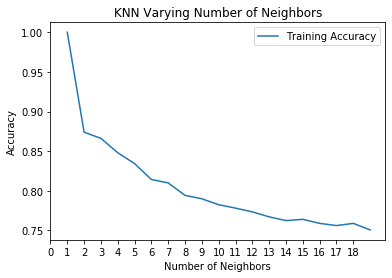

In [38]:
neighbors4, train_accuracy4 = testK(X_train4_cmp, y_train4)
plotTestK(neighbors4, train_accuracy4)

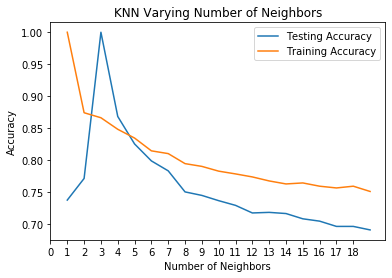

In [39]:
y_test4 = getTestLabelsKNN(3, X_train4_cmp, y_train4, X_test4_cmp)
n4, test_acc4, train_acc4 = optimizeK(X_train4_cmp, y_train4, X_test4_cmp, y_test4)
plotK(n4, test_acc4, train_acc4)

In [40]:
countUniqueValues(y_test4)

Values: dict_keys([2, 1, 4, 7, 8, 3, 9, 5, 6])
Keys: dict_values([159, 103, 110, 81, 135, 112, 81, 178, 133])


In [41]:
knn_score4, knn_y_pred4 = runKNN(5, X_train4_cmp, y_train4, X_test4_cmp, y_test4)
print(f'Accuracy: {knn_score4}')

Accuracy: 0.825091575091575


KNN Accuracy Score, k=5: 0.825091575091575

KNN Confusion Matrix, k=5

[[ 64  12  10   6   2   2   1   4   2]
 [  4 136   9   2   1   1   2   3   1]
 [  1   9  93   2   4   1   0   0   2]
 [  5   3   0  93   9   0   0   0   0]
 [  0   1   7   2 144  19   2   1   2]
 [  0   0   0   2   4 121   2   2   2]
 [  0   0   0   0   2   6  58  12   3]
 [  0   2   0   0   1   0   4 128   0]
 [  0   2   0   1   2   3   6   3  64]]

		  KNN Classification Report, k=5

              precision    recall  f1-score   support

           1       0.86      0.62      0.72       103
           2       0.82      0.86      0.84       159
           3       0.78      0.83      0.81       112
           4       0.86      0.85      0.85       110
           5       0.85      0.81      0.83       178
           6       0.79      0.91      0.85       133
           7       0.77      0.72      0.74        81
           8       0.84      0.95      0.89       135
           9       0.84      0.79      0.82        81

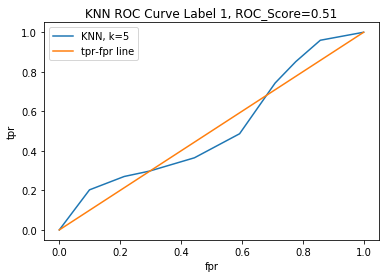

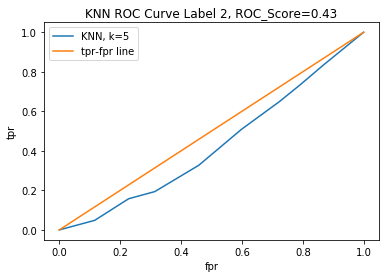

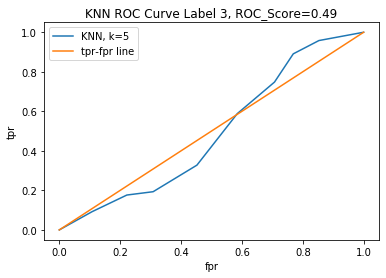

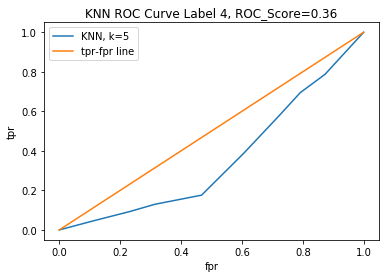

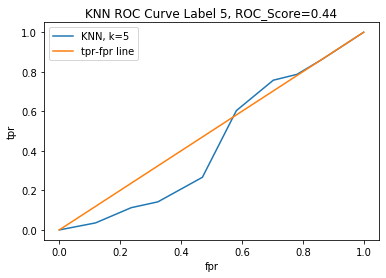

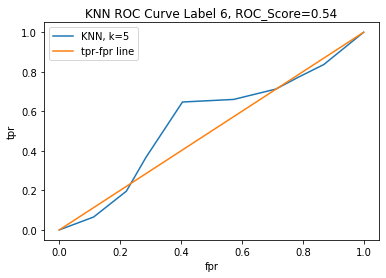

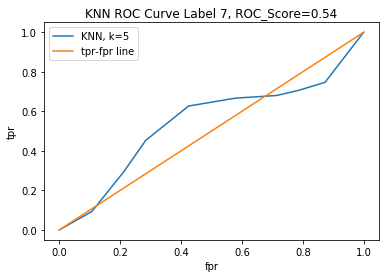

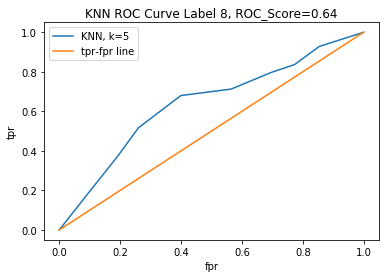

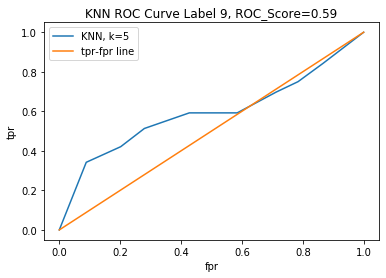

In [46]:
n_neighbors4=5
getScoresKNN(n_neighbors4, y_test4, knn_y_pred4)
pd.crosstab(y_test4, knn_y_pred4, rownames=['True'], colnames=['Predicted'], margins=True)
calcMultiClassROCAUC(X_train4_cmp, y_train4, X_test4_cmp, knn_y_pred4, model='KNN', tuner='k',\
 tuner_val=n_neighbors4, label_len=9, dec=False)

## LR for DS4

Logistic Regression Highest Accuracy Score, C=20: 0.3489010989010989

Logistic Regression Most Accurate Confusion Matrix

[[24 19 16 13  7  2  4  9  9]
 [25 50 27 21  7 10  4  8  7]
 [15  9 59  6  4  8  2  3  6]
 [18 15 13 32  6 10  6  5  5]
 [11  5 20 36 37 26 16 16 11]
 [ 1  5  9  2 20 48 31  5 12]
 [ 3  1  2  3  7  3 36 12 14]
 [ 5 10  2  1  3  9 21 58 26]
 [ 5  3  6  3  4  8  2 13 37]]


	   Logistic Regression Classification Report C=20

              precision    recall  f1-score   support

           1       0.22      0.23      0.23       103
           2       0.43      0.31      0.36       159
           3       0.38      0.53      0.44       112
           4       0.27      0.29      0.28       110
           5       0.39      0.21      0.27       178
           6       0.39      0.36      0.37       133
           7       0.30      0.44      0.35        81
           8       0.45      0.43      0.44       135
           9       0.29      0.46      0.36        81

    accurac

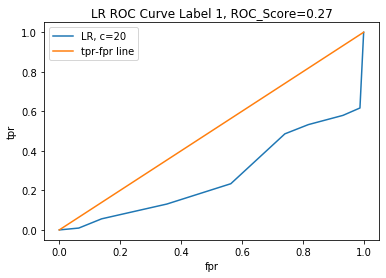

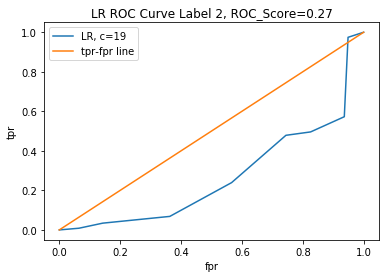

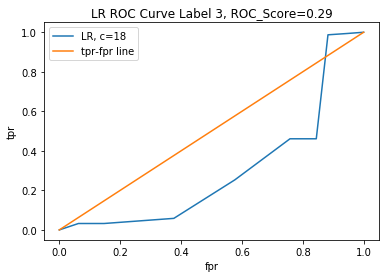

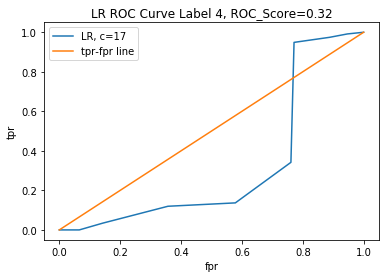

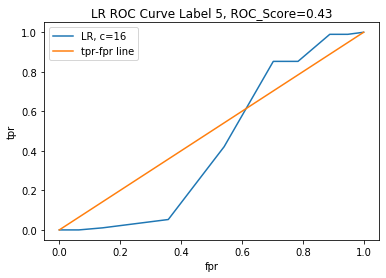

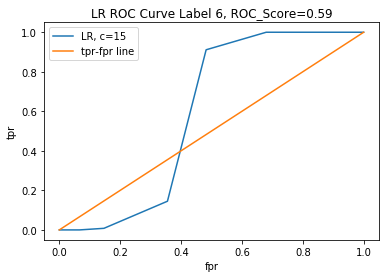

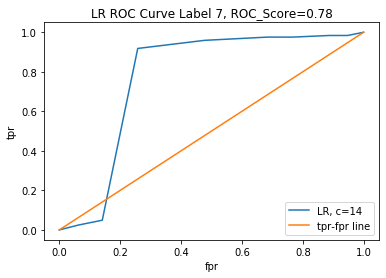

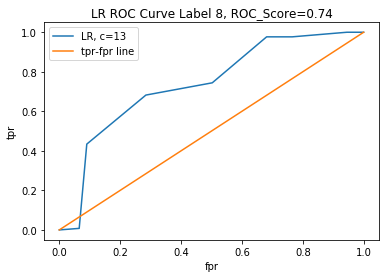

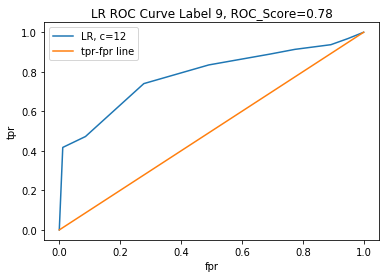

In [47]:
c4 = 20
lr_cma4, lr_cr4, lr_acc4, lr_y_pred4, ky4, val4 = runLogisticRegression(c4, X_train4, y_train4, X_test4, y_test4)
print(f'Logistic Regression Highest Accuracy Score, C={c4}: {val4}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma4[ky4]}\n')
pd.crosstab(y_test4, lr_y_pred4[ky4], rownames=['True'], colnames=['Predicted'], margins=True)
print(f'\n\t   Logistic Regression Classification Report C={c4}\n\n{lr_cr4[ky4]}')
calcMultiClassROCAUC(X_train4, y_train4, X_test4, lr_y_pred4[ky4], model='LR', tuner='c', tuner_val=c4, label_len=9, dec=True)

## Random Forest for DS4

Random Forest Accuracy Score: 0.40201465201465203

Random Forest Confusion Matrix

[[28 15 20 14  7  2  5  5  7]
 [29 58 19 18  7 11  6  4  7]
 [14 10 65  8  7  2  1  0  5]
 [18 18 14 35 11  5  3  1  5]
 [14  5  7 35 50 32 14  9 12]
 [ 4  2  3  2 17 58 28  3 16]
 [ 2  2  0  2  6  6 37 12 14]
 [ 7  7  5  1  0  5 19 68 23]
 [ 5  7  3  3  5  5  3 10 40]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.23      0.27      0.25       103
           2       0.47      0.36      0.41       159
           3       0.48      0.58      0.52       112
           4       0.30      0.32      0.31       110
           5       0.45      0.28      0.35       178
           6       0.46      0.44      0.45       133
           7       0.32      0.46      0.38        81
           8       0.61      0.50      0.55       135
           9       0.31      0.49      0.38        81

    accuracy                           0.40      1092
   macro 

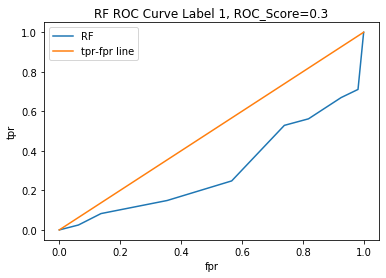

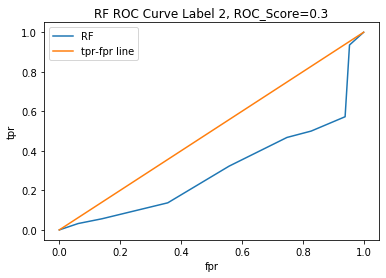

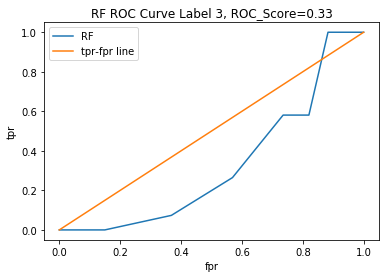

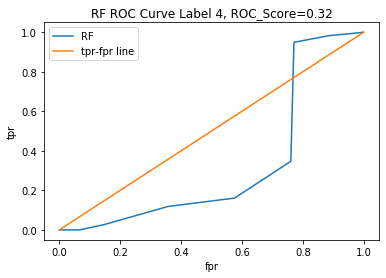

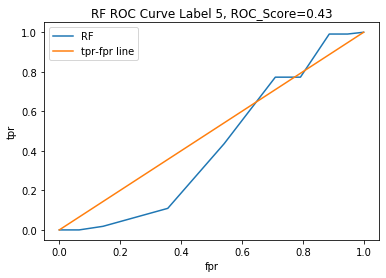

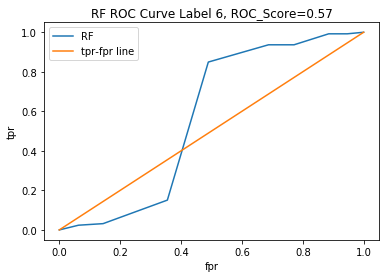

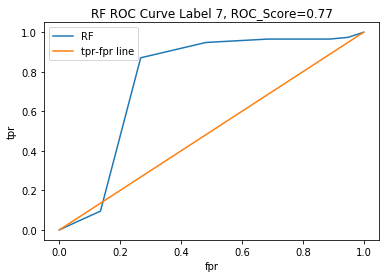

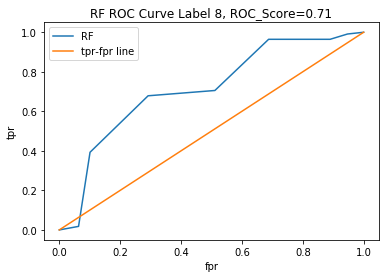

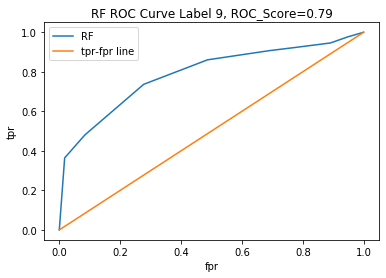

In [48]:
runRandomForest(X_train4, y_train4, X_test4, y_test4, 9)

## SVM for DS4

SVM linear Kernel results
_________________________________________
SVM linear Kernel Accuracy Score: 0.19963369963369965

SVM linear Kernel Confusion Matrix

[[22 11 10 15  7 13  7  9  9]
 [43 23 19  7 15  9 12 15 16]
 [29  3 17 27  9 12  1 12  2]
 [12 17 14 23 14  8 10  6  6]
 [24 24 18 22 43 18 12 14  3]
 [ 0 13 10  8 25 26 41  5  5]
 [ 5  5  5  6  5 11 29  8  7]
 [23 14 12  5 14 19 23 16  9]
 [ 6  8  8  4  7  6  7 16 19]]


		    SVM linear Kernel Classification Report

              precision    recall  f1-score   support

           1       0.13      0.21      0.16       103
           2       0.19      0.14      0.17       159
           3       0.15      0.15      0.15       112
           4       0.20      0.21      0.20       110
           5       0.31      0.24      0.27       178
           6       0.21      0.20      0.20       133
           7       0.20      0.36      0.26        81
           8       0.16      0.12      0.14       135
           9       0.25      0.23 

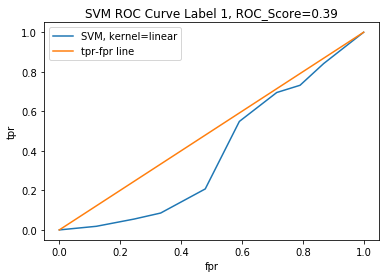

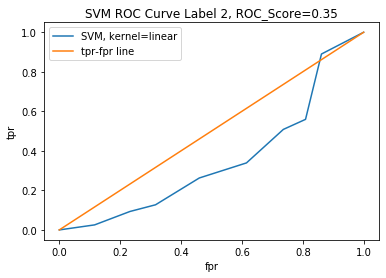

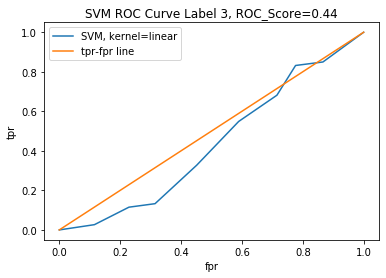

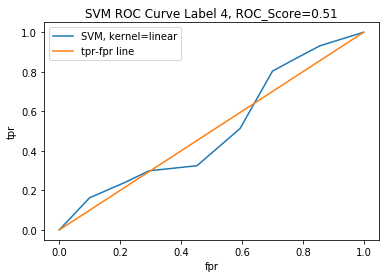

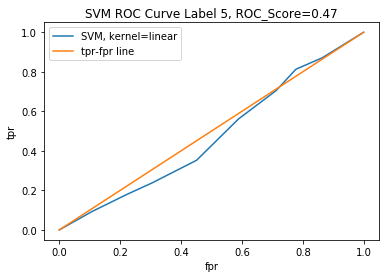

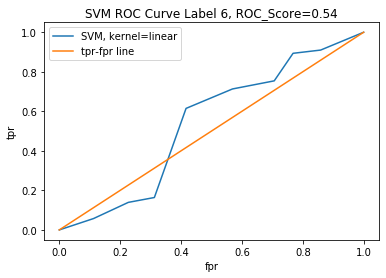

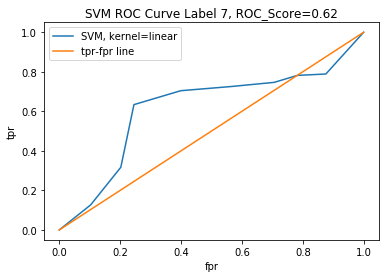

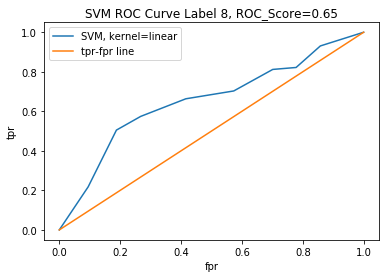

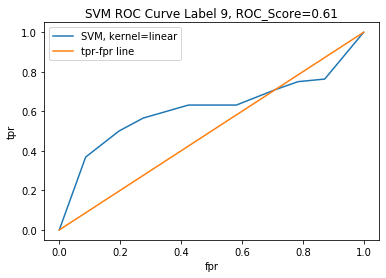

SVM poly Kernel results
_________________________________________
SVM poly Kernel Accuracy Score: 0.5

SVM poly Kernel Confusion Matrix

[[38 10  1 21  5  7  4  3 14]
 [32 68 13  5  6 12  6  1 16]
 [ 8 13 48  8 10 15  0  0 10]
 [13  4  3 51 19  6  1  1 12]
 [ 3  4  6 19 93 26  8  3 16]
 [ 1  1  0  0 15 74 20  1 21]
 [ 2  0  0  0  1  9 52  6 11]
 [ 4  3  2  2  1  1 38 60 24]
 [ 3  0  2  0  2  3  4  5 62]]


		    SVM poly Kernel Classification Report

              precision    recall  f1-score   support

           1       0.37      0.37      0.37       103
           2       0.66      0.43      0.52       159
           3       0.64      0.43      0.51       112
           4       0.48      0.46      0.47       110
           5       0.61      0.52      0.56       178
           6       0.48      0.56      0.52       133
           7       0.39      0.64      0.49        81
           8       0.75      0.44      0.56       135
           9       0.33      0.77      0.46        81

   

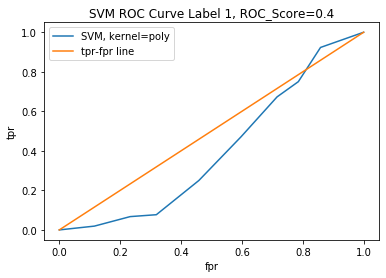

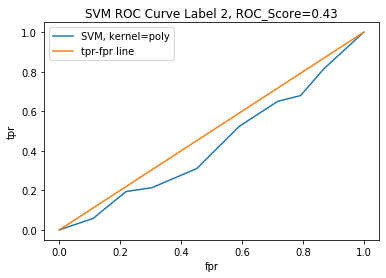

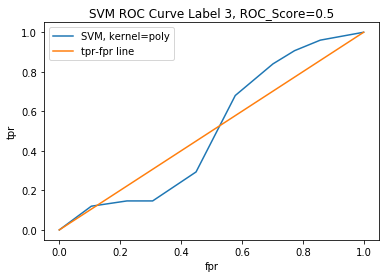

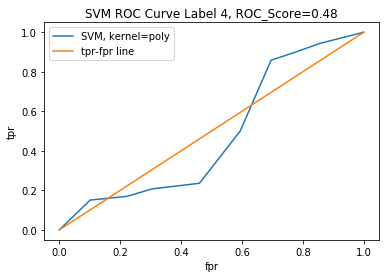

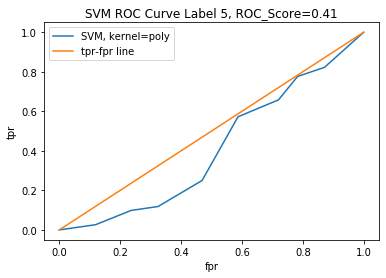

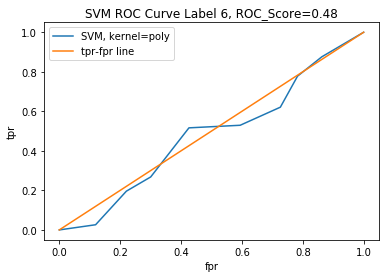

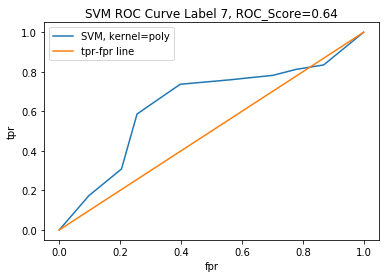

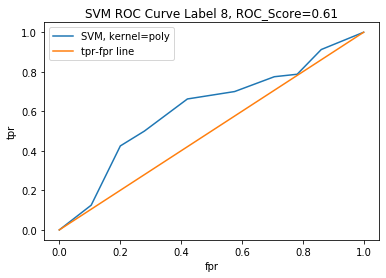

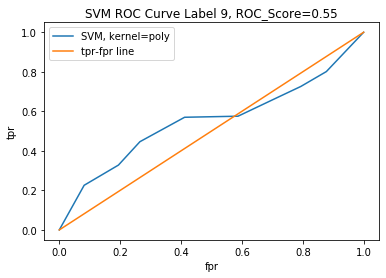

SVM rbf Kernel results
_________________________________________
SVM rbf Kernel Accuracy Score: 0.4935897435897436

SVM rbf Kernel Confusion Matrix

[[40 13  8 16  3  2  1  8 12]
 [44 66 22  3  2  1  9  5  7]
 [11 22 54  6  8  2  0  5  4]
 [24 13  6 43 13  3  5  0  3]
 [ 1  2 13 15 88 31  8  4 16]
 [ 4  0  0  2  7 72 33  2 13]
 [ 0  0  0  0  2  9 48  7 15]
 [ 2  3  1  0  2  0 35 71 21]
 [ 2  2  2  2  2  0  8  6 57]]


		    SVM rbf Kernel Classification Report

              precision    recall  f1-score   support

           1       0.31      0.39      0.35       103
           2       0.55      0.42      0.47       159
           3       0.51      0.48      0.50       112
           4       0.49      0.39      0.44       110
           5       0.69      0.49      0.58       178
           6       0.60      0.54      0.57       133
           7       0.33      0.59      0.42        81
           8       0.66      0.53      0.58       135
           9       0.39      0.70      0.50    

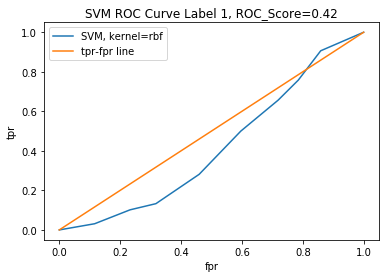

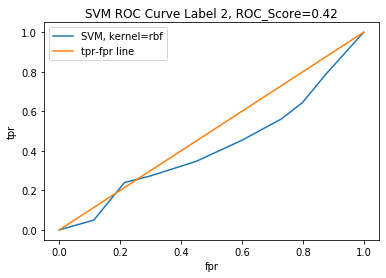

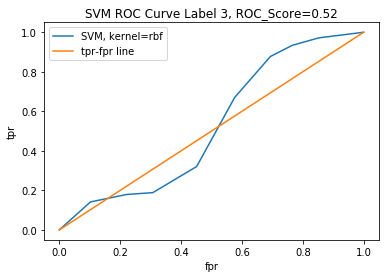

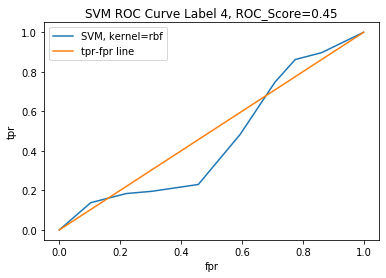

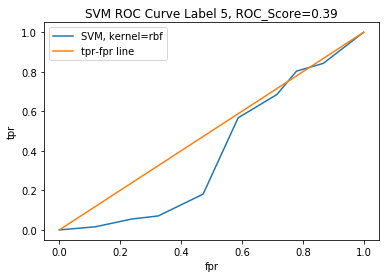

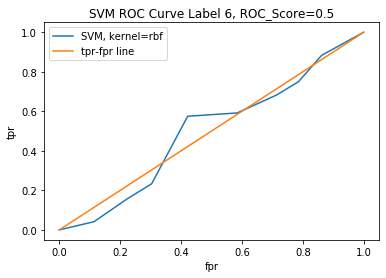

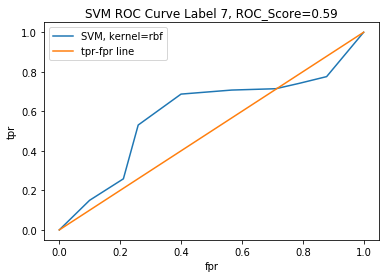

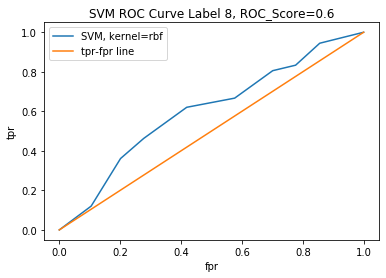

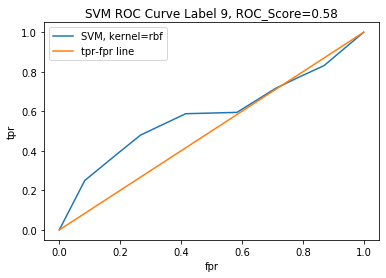

SVM sigmoid Kernel results
_________________________________________
SVM sigmoid Kernel Accuracy Score: 0.17582417582417584

SVM sigmoid Kernel Confusion Matrix

[[14 20 11  9  5 11  1 28  4]
 [34 37 15  7  5 20  6 21 14]
 [16 10 11 26  9 17  1 20  2]
 [10 34 13  5  6  6  4 24  8]
 [10 37 14 29 25 16 10 31  6]
 [ 1  6  6  9 14 31 55  6  5]
 [11  5  9  2  4 15 25  6  4]
 [15  4 26 17  3 28  9 25  8]
 [ 9  2  6  3  5 13  7 17 19]]


		    SVM sigmoid Kernel Classification Report

              precision    recall  f1-score   support

           1       0.12      0.14      0.13       103
           2       0.24      0.23      0.24       159
           3       0.10      0.10      0.10       112
           4       0.05      0.05      0.05       110
           5       0.33      0.14      0.20       178
           6       0.20      0.23      0.21       133
           7       0.21      0.31      0.25        81
           8       0.14      0.19      0.16       135
           9       0.27      0

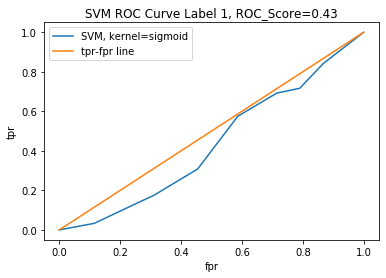

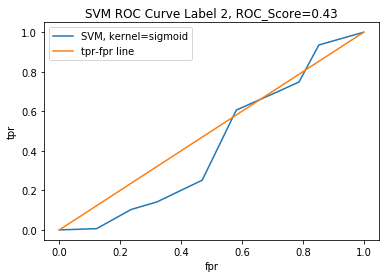

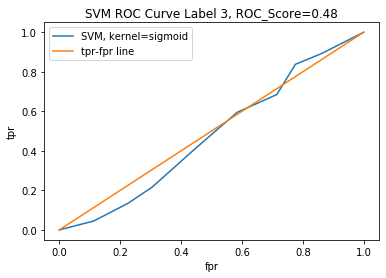

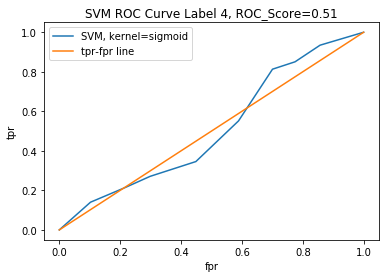

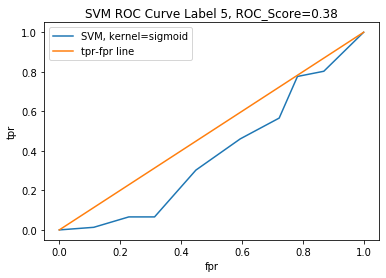

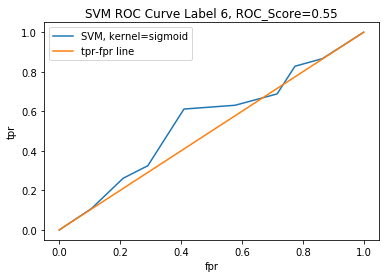

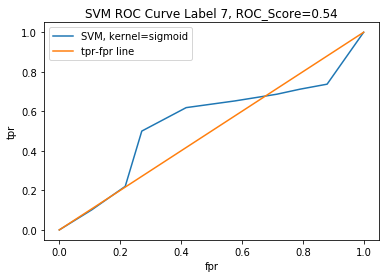

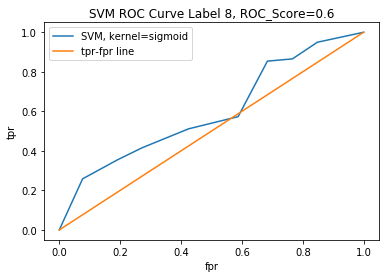

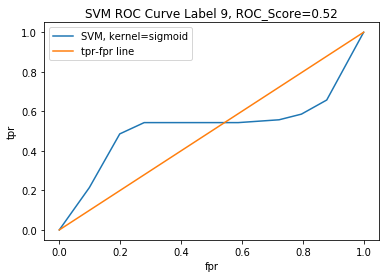

In [49]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, 9, X_train4_cmp, y_train4, X_test4_cmp, y_test4)